In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/song_data.csv')
print(data.shape)
data.head()

(18835, 15)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


### **Решение 1 пункта**



Для начала отобразим график нашего распределения и нормального.

In [ ]:
comp = pd.DataFrame(data, columns=['song_popularity'])
comp.dropna()
comp

,song_popularity
audio_valence,
0.474,73
0.370,66
0.324,76
0.198,74
0.574,56
...,...
0.300,60
0.265,60
0.286,23


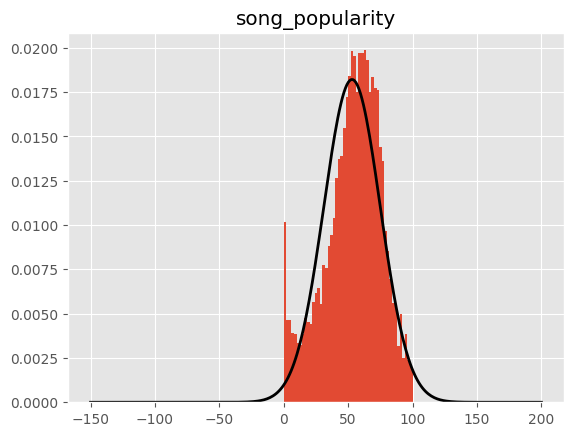

In [ ]:
comp.hist(bins = 50, density=True)

xs = np.linspace(-150, 200, 300)
ys = stats.norm(loc=comp.mean(), scale = comp.std(ddof=3)).pdf(xs)
plt.plot(xs, ys, color = 'black', lw=2);

Из вышеприведённого графика видим, что распределение куполообразно и, возможно, является нормальным. Проверим этом на диаграмме квантиль-квантиль.

((array([-3.96433549, -3.74743334, -3.62871405, ...,  3.62871405,
          3.74743334,  3.96433549]),
  array([  0,   0,   0, ..., 100, 100, 100])),
 (21.615933063196255, 52.991876825059734, 0.9866012932290195))

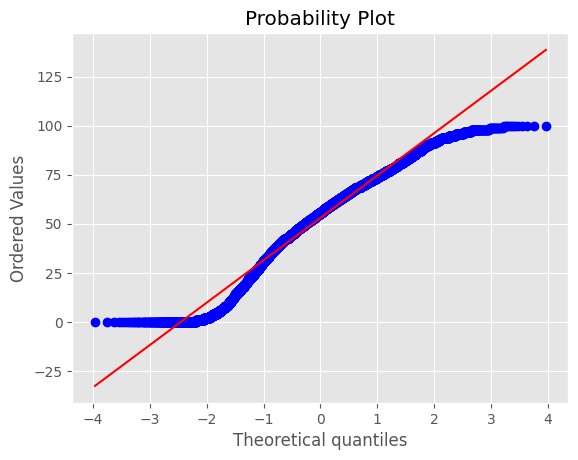

In [ ]:
col_list = []
for i in range(len(comp)):
    col_list.append(comp.iloc[i, 0])
    
stats.probplot(col_list, dist="norm", plot=plt)

По оси Х отложены теоретические квантили, по оси Y - выборочные. Из приведённого графика видим, что синие точки(выборка) лежат не целиком на красной линии, значит, распределение не является нормальным.
Проверим гипотезу тестом Колмогорова.

In [ ]:
stats.kstest(col_list, 'norm')

KstestResult(statistic=0.9728470756875098, pvalue=0.0, statistic_location=3, statistic_sign=-1)

pvаlue = 0 --> гипотеза о нормальности распределения не подтверждается.
(ниже приводится дополнительная проверка критерием Андерсона-Дарлинга)

In [ ]:
from statsmodels.stats.diagnostic import normal_ad
pval = normal_ad(comp)[1]
pval

0.0

### **Решение 2 пункта**


Воспользуемся критерием Пиросна, чтобы протестировать однородность двух выборок: длительность песни и её продолжительность

In [ ]:
df = pd.DataFrame(data, columns=['song_popularity', 'song_duration_ms'])
df

,song_popularity,song_duration_ms
0,73,262333
1,66,216933
2,76,231733
3,74,216933
4,56,223826
...,...,...
18830,60,159645
18831,60,205666
18832,23,182211
18833,55,352280


In [ ]:
df_1 = df[(df['song_popularity'] < 50) & (df['song_duration_ms'] > 220000)] #unpopular and long
count_1 = len(df_1)
df_2 = df[(df['song_popularity'] < 50) & (df['song_duration_ms'] <= 220000)] #unpopular and short
count_2 = len(df_2)
df_3 = df[(df['song_popularity'] >= 50) & (df['song_duration_ms'] > 220000)] #popular and long
count_3=len(df_3)
df_4 = df[(df['song_popularity'] >= 50) & (df['song_duration_ms'] <= 220000)] #popular and short
count_4=len(df_4)
print(count_1, count_2, count_3, count_4)

2994 4243 4742 6856


In [ ]:
fd = pd.DataFrame([[count_3, count_4],[count_1, count_2]])
fd.columns=['Long', 'Short']
fd.index=['Popular', 'Unpopular']
fd

,Long,Short
Popular,4742,6856
Unpopular,2994,4243


In [ ]:
fd.values

array([[4742, 6856],
       [2994, 4243]])

In [ ]:
from scipy.stats import chi2_contingency
pvalue, k = stats.kruskal(fd.values)
print(pvalue, k)

0.4122038003978397 0.5208530574677956 1


pvalue имеет достаточно большое значение, значит мы можем сделать вывод, что гипотеза об однородности выборок не отвергается.

### **Решение пункта 3**

In [ ]:
df = pd.DataFrame(data, columns=['song_popularity', 'song_duration_ms'])
df

,song_popularity,song_duration_ms
0,73,262333
1,66,216933
2,76,231733
3,74,216933
4,56,223826
...,...,...
18830,60,159645
18831,60,205666
18832,23,182211
18833,55,352280


In [ ]:
df_1 = df[(df['song_popularity'] < 50) & (df['song_duration_ms'] > 220000)] #unpopular and long
count_1 = len(df_1)
df_2 = df[(df['song_popularity'] < 50) & (df['song_duration_ms'] <= 220000)] #unpopular and short
count_2 = len(df_2)
df_3 = df[(df['song_popularity'] >= 50) & (df['song_duration_ms'] > 220000)] #popular and long
count_3=len(df_3)
df_4 = df[(df['song_popularity'] >= 50) & (df['song_duration_ms'] <= 220000)] #popular and short
count_4=len(df_4)
print(count_1, count_2, count_3, count_4)

2994 4243 4742 6856


In [ ]:
ex1 = ((count_3 + count_4) * (count_3 + count_1)) // (count_1 + count_2 + count_3 + count_4)
ex2 = ((count_3 + count_4) * (count_4 + count_2)) // (count_1 + count_2 + count_3 + count_4)
ex3 = ((count_1 + count_3) * (count_1 + count_2)) // (count_1 + count_2 + count_3 + count_4)
ex4 = ((count_2 + count_4) * (count_2 + count_1)) // (count_1 + count_2 + count_3 + count_4)

print(ex1, ex2, ex3, ex4)

4763 6834 2972 4264


In [ ]:
fd = pd.DataFrame([[count_3, count_4],[count_1, count_2]])
fd.columns=['Long', 'Short']
fd.index=['Popular', 'Unpopular']
fd  #original table

,Long,Short
Popular,4742,6856
Unpopular,2994,4243


In [ ]:
fde = pd.DataFrame([[ex3, ex4],[ex1, ex2]])
fde.columns=['Long', 'Short']
fde.index=['Popular', 'Unpopular']
fde  #expected table

,Long,Short
Popular,2972,4264
Unpopular,4763,6834


Рассчитаем статистику критерия независимости (хи-квадрат)

In [ ]:
ksi2 = ((count_1-ex1)**2)//ex1 + ((count_2-ex2)**2)//ex2 + ((count_3-ex3)**2)//ex3 + ((count_4-ex4)**2)//ex4
print(ksi2, 'k =', 1, 'pvalue =', 0.05)

4268 k = 1 pvalue = 0.05


Для уровня значимости 0.05 и степеней свободы 1 критическое значение хи-квадрат равно 3.84.  Так как 4268 > 3.84, то нулевая гипотеза отвергается.